### CNN


In [229]:
import numpy as np
import matplotlib.pyplot as plt

<b>2D convolution</b><br>
Kernel W shape: (hxw) <br>

$$y_{ij}=\sum_{k=0}^h \sum_{l=0}^w  X_{i+k,j+l}*w_{kl} $$ 


Output shape:<br>
Let, Input shape: X: (HxW) <br>
     Kernel shape: W: (hxw) <br>
     Output shape: y: (hhxww)<br>

output height would be, 
$$hh = \frac{H-h +2*pad}{stride}+1$$

Let, padding, pad=0 , filter size, hxw=(5x5), stride=1 and Input size: (28x28)<br>
So, $$hh = \frac{28-5+2*0}{1}+1=24$$
Similarly, 
$$ww = \frac{28-5+2*0}{1}+1=24$$

<b>Task 1: 2D convolution</b> <br>
calculate output. <br>
Output should like below,<br><br>
[[ 100.   30.  -50.  -94.]<br>
 [ -50.  -50.  -10.  -85.]<br>
 [-230.   60.   30. -156.]<br>
 [-240.  140.  128. -189.]]

In [202]:
X=np.array([[10,10,20,0,0, 4], [0, 0,50,50,20, 0], [10,60,0,0,30, 2], [120,20,40,40,0, 1], [70, 0,10,80,90, 0], [40, 40,0,0,8,10]])
K=np.array([[-1,0, 1],[-2,0,2], [-1,0,1]])
print(X)
print('kernel:')
print( K)

[[ 10  10  20   0   0   4]
 [  0   0  50  50  20   0]
 [ 10  60   0   0  30   2]
 [120  20  40  40   0   1]
 [ 70   0  10  80  90   0]
 [ 40  40   0   0   8  10]]
kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


In [203]:
def conv(x):
    r=(len(X)-len(K)+1)
    c = r
    out = np.zeros([r,c])
    m = np.zeros([len(K),len(K)])

    for i in range(r):
        for j in range(c):
            for k in range(len(K)):
                for l in range(len(K)):
                    m[k][l]=X[k+i][l+j]
            s = np.sum(np.multiply(m,K))
            out[i][j]=s
    return out
o = conv(X)
print(o)

[[ 100.   30.  -50.  -94.]
 [ -50.  -50.  -10.  -85.]
 [-230.   60.   30. -156.]
 [-240.  140.  128. -189.]]


<b>Task 2: ReLU</b><br>
$$y=max(0,x)$$

[[100.,  30.,   0.,   0.],<br>
[  0.,   0.,   0.,   0.],<br>
[  0.,  60.,  30.,   0.],<br>
[  0., 140., 128.,   0.]]

In [204]:
#your code goes here.
def relu(X):
    return np.maximum(0,X)
yh = relu(out)
print(yh)

[[100.  30.   0.   0.]
 [  0.   0.   0.   0.]
 [  0.  60.  30.   0.]
 [  0. 140. 128.   0.]]


<b>Task 3: MaxPooling</b><br>
Pool size=2<br>
    
output should like below,<br>
[[100. -10.] <br>
 [140. 128.]] 

In [205]:
#your code goes here.
def maxPool(y,size):
    ps = int(len(y)/size)
    maxVal = 0
    currentMax = 0
    pool = np.zeros([ps,ps])
    ii=0
    jj=0
    for i in range(0,len(y),size):
        for j in range(0,len(y),size):
            for k in range(size):
                for l in range(size):
                    currentMax = y[k+i][j+l]
                    if (currentMax>maxVal):
                        maxVal = currentMax
           
            pool[ii][jj]=maxVal
            jj = jj + 1 
        
            maxVal = 0
            currentMax = 0
        jj = 0  
        ii = ii + 1
        
    return pool
            
p = maxPool(yh,2)
print(p)

[[100.   0.]
 [140. 128.]]


<b>Task 4: Apply on Image</b>
1. Load <b>lena.png</b> and plot the image.
2. apply convolution and plot the output (use the filter used above)
3. apply relu and plot the output
4. apply maxpool and plot the output.

In [206]:
#your code goes here.

<b>Import OpenCV python library</b><br>
Install if necessary. [Link](https://pypi.org/project/opencv-python/)

In [207]:
import cv2

In [208]:
org = cv2.imread('lena.png')
org= cv2.cvtColor(org, cv2.COLOR_BGR2RGB) #for matplotlib

In [209]:
print('rgb image shape: ',org.shape)

rgb image shape:  (220, 220, 3)


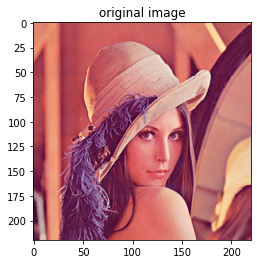

In [210]:
plt.imshow(org )
plt.title("original image")
plt.show()

<b>Convert to grayscale</b>

In [211]:
X = cv2.cvtColor(org, cv2.COLOR_BGR2GRAY)
X.shape

(220, 220)

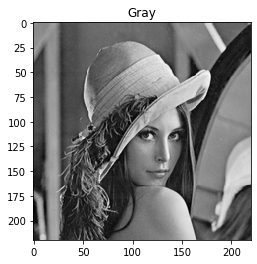

In [212]:
plt.imshow(X, cmap='gray')
plt.title("Gray")
plt.show()

In [213]:
#apply convolution
x = np.array(X)
c = conv(x)
print(c)

[[ -16.    2.    3. ...  166.  123. -108.]
 [ -10.    1.    2. ...   35.  -14. -133.]
 [  -2.   -1.    5. ... -125. -118.  -88.]
 ...
 [   5.   11.   33. ...   -4.   31.   63.]
 [   5.   16.   21. ...   38.   65.   58.]
 [   7.   15.   14. ...   76.   71.   32.]]


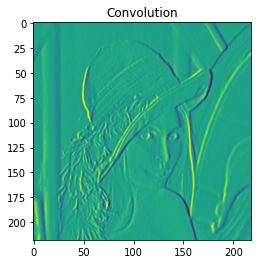

In [214]:
#plot
plt.imshow(c)
plt.title("Convolution")
plt.show()

In [215]:
#apply relu
y = relu(c)
print(y)

[[  0.   2.   3. ... 166. 123.   0.]
 [  0.   1.   2. ...  35.   0.   0.]
 [  0.   0.   5. ...   0.   0.   0.]
 ...
 [  5.  11.  33. ...   0.  31.  63.]
 [  5.  16.  21. ...  38.  65.  58.]
 [  7.  15.  14. ...  76.  71.  32.]]


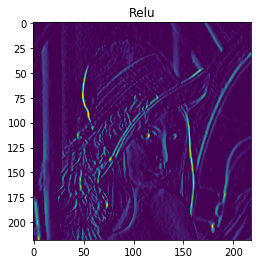

In [216]:
#plot
plt.imshow(y)
plt.title("Relu")
plt.show()

In [227]:
#apply maxpool
p = maxPool(y,2)
print(p)
#plot

[[  2.   3.   1. ...  15. 166. 123.]
 [  0.   8.   0. ...   0.   0.   0.]
 [  0.   5.   3. ...   0.   0.  17.]
 ...
 [ 61.  85. 318. ...   0.   0.   0.]
 [ 12.  46. 439. ...  22.   4.  63.]
 [ 16.  27. 489. ...  43.  76.  71.]]


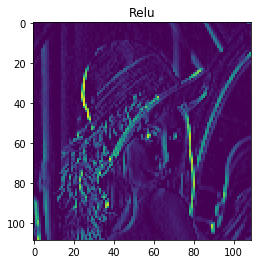

In [228]:
plt.imshow(p)
plt.title("Relu")
plt.show()